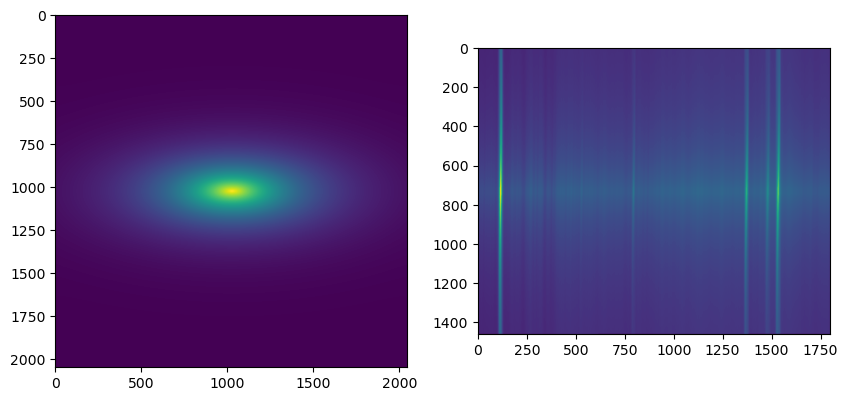

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

import astropy.io.fits as pyfits
from astropy.wcs import WCS
import astropy.units as u
u.imperial.enable()


galaxSpect = 'Galax_Spect.fits'
#pyfits.info(file_flux)
hdu = pyfits.open(galaxSpect)
IMG = hdu[1].data
LSS = hdu[2].data
headerIMG= hdu[1].header
headerLSS = hdu[2].header


def imgEnd(header):
    return header["CRVAL1"]+(header["NAXIS1"]-2)*header["CDELT1"]
    
#xIMG = np.arange(headerIMG["CRVAL1"], imgEnd(headerIMG) + headerIMG["CDELT1"], headerIMG["CDELT1"])

#yIMG = lambda x: IMG[x]


fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(IMG)
axes[1].imshow(LSS)

plt.show()


In [59]:
headerIMG

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXESD=                    2                                                  
CRPIX1D =              1024.5                                                   
CRPIX2D =              1024.5                                                   
CDELT1D =               0.018                                                   
CDELT2D =               0.018                                                   
CUNIT1D = 'mm      '        

In [61]:
headerLSS

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1800                                                  
NAXIS2  =                 1463                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    1 / Number of coordinate axes                      
CRPIX1  =                  1.0 / Pixel coordinate of reference point            
CRPIX2  =                  1.0 / Pixel coordinate of reference point            
CDELT1  =  1.1745426707708E-10 / [m] Coordinate increment at reference point    
CDELT2  =            0.0013675 / [arcsec] Coordinate increment at reference poin
CUNIT1  = 'm'               

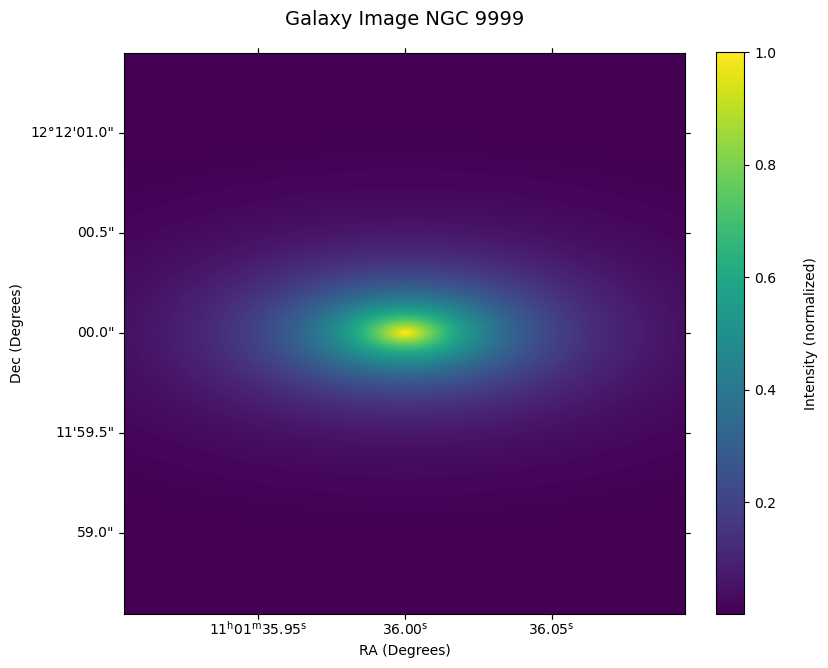

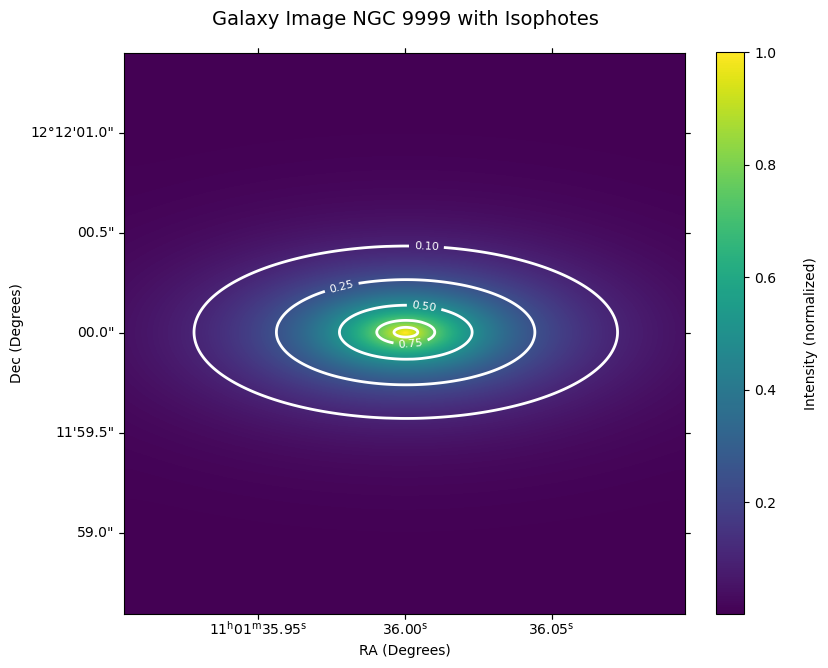

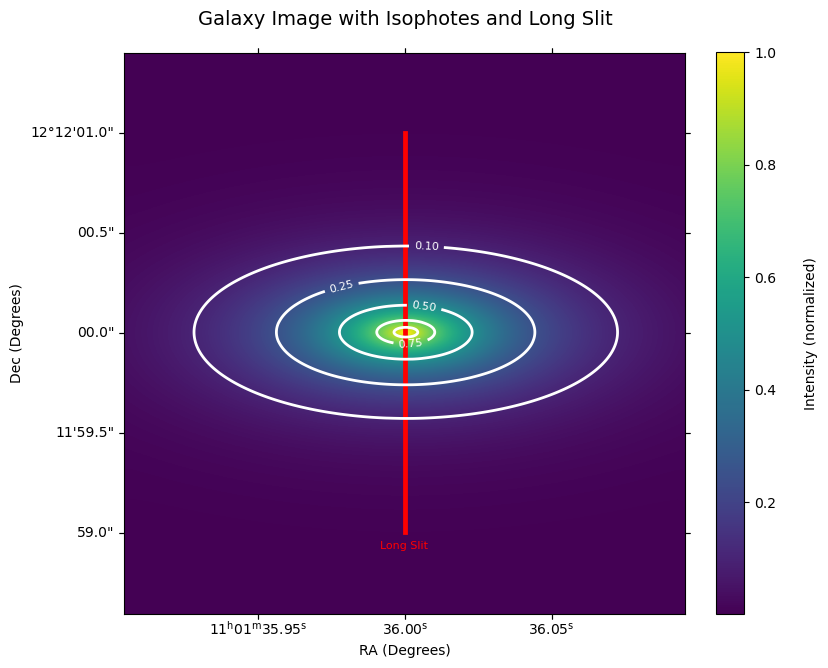

In [63]:
# normalizing IMG data for plots
IMG_normalized = IMG / np.max(IMG)

# set WCS object from IMG header
wcsIMG = WCS(headerIMG)

# show galaxy image in WCS (normal)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=wcsIMG)

caxIMG = ax.imshow(IMG_normalized, cmap='viridis', origin='lower', interpolation='nearest')

cbarIMG = plt.colorbar(caxIMG, ax=ax, label='Intensity (normalized)', fraction=0.0453)

cbarIMG.set_label('Intensity (normalized)', labelpad=20)

ax.set_xlabel('RA (Degrees)')
ax.set_ylabel('Dec (Degrees)')

ax.set_title('Galaxy Image NGC 9999', fontsize=14, pad=20)

plt.show()

# show galaxy image in WCS (Isophotes)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=wcsIMG)

caxIMG = ax.imshow(IMG_normalized, cmap='viridis', origin='lower', interpolation='nearest')

cbarIMG = plt.colorbar(caxIMG, ax=ax, label='Intensity (normalized)', fraction=0.0453)

cbarIMG.set_label('Intensity (normalized)', labelpad=20)

levelsIMG = [0.1, 0.25, 0.5, 0.75, 0.9]
contoursIMG = ax.contour(IMG_normalized, levels=levelsIMG, colors='white', linewidths=2)

ax.clabel(contoursIMG, inline=True, fontsize=8)

ax.set_xlabel('RA (Degrees)')
ax.set_ylabel('Dec (Degrees)')

ax.set_title('Galaxy Image NGC 9999 with Isophotes', fontsize=14, pad=20)

plt.show()

# show galaxy image in WCS (Isophotes with slit)
slit_x_center = headerIMG["CRPIX1"] 
slit_y_center = headerIMG["CRPIX1"]

SLITLEN = headerLSS["SLITLEN"] / 3600
SLITWID = headerLSS["SLITWID"] / 3600

slit_length_pixels = SLITLEN / wcsIMG.wcs.cdelt[0]
slit_width_pixels = SLITWID / wcsIMG.wcs.cdelt[1] 

slit_x_Start = slit_x_center - slit_width_pixels / 2
slit_y_Start = slit_y_center - slit_length_pixels / 2

slit_rect = Rectangle((slit_x_Start, slit_y_Start), slit_width_pixels, slit_length_pixels, 
                      edgecolor='red', facecolor='none', lw=2, label='Long Slit')

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=wcsIMG)

caxIMG = ax.imshow(IMG_normalized, cmap='viridis', origin='lower', interpolation='nearest')

cbarIMG = plt.colorbar(caxIMG, ax=ax, label='Intensity (normalized)', fraction=0.0453)

cbarIMG.set_label('Intensity (normalized)', labelpad=20)

levelsIMG = [0.1, 0.25, 0.5, 0.75, 0.9]
contoursIMG = ax.contour(IMG_normalized, levels=levelsIMG, colors='white', linewidths=2)

ax.clabel(contoursIMG, inline=True, fontsize=8)

ax.add_patch(slit_rect)

label = 'Long Slit'
ax.text(
    slit_x_Start, 
    slit_y_Start - slit_width_pixels * 4,  
    label, 
    color='red',
    fontsize=8,
    ha='center',
    va='top'
)

ax.set_xlabel('RA (Degrees)')
ax.set_ylabel('Dec (Degrees)')

ax.set_title('Galaxy Image with Isophotes and Long Slit', fontsize=14, pad=20)

plt.show()

In [65]:
# define physical absolute axis
xIMG = headerIMG["CRVAL1"] + (np.arange(headerIMG["NAXIS1"]) - (headerIMG["CRPIX1"] - 1)) * headerIMG["CDELT1"]
yIMG = headerIMG["CRVAL2"] + (np.arange(headerIMG["NAXIS2"]) - (headerIMG["CRPIX2"] - 1)) * headerIMG["CDELT2"]

x_DEG_IMG = xIMG * u.deg
y_DEG_IMG = yIMG * u.deg

xLSS = headerLSS["CRVAL1"] + (np.arange(headerLSS["NAXIS1"]) - (headerLSS["CRPIX1"] - 1)) * headerLSS["CDELT1"]
yLSS = headerLSS["CRVAL2"] + (np.arange(headerLSS["NAXIS2"]) - (headerLSS["CRPIX2"] - 1)) * headerLSS["CDELT2"]

x_M_LSS = xLSS * u.m
y_ARCSEC_LSS = yLSS * u.arcsec

# define physical relative IMAGE axis with proper units
xIMGStart = headerIMG["CRVAL1"] * u.deg
yIMGStart = headerIMG["CRVAL2"] * u.deg

x_DEG_IMG_rel = x_DEG_IMG - xIMGStart
y_DEG_IMG_rel = y_DEG_IMG - yIMGStart

x_ARCSEC_IMG_rel = x_DEG_IMG_rel.to(u.arcsec)
y_ARCSEC_IMG_rel = y_DEG_IMG_rel.to(u.arcsec)

# define physical (relative) LSS axis with proper units
x_NM_LSS = x_M_LSS.to(u.nm)

yLSSStart = headerLSS["CRVAL2"] * u.arcsec

y_ARCSEC_LSS_rel = y_ARCSEC_LSS - yLSSStart
y_DEG_LSS = y_ARCSEC_LSS.to(u.deg)

Hubble constant H0 = 67.74 km / (Mpc s)
speed of light c = 299792.458 km / s
velocity at z = 0.3 is 76898.43718215614 km / s
distance d = 1135.1998403034565 Mpc



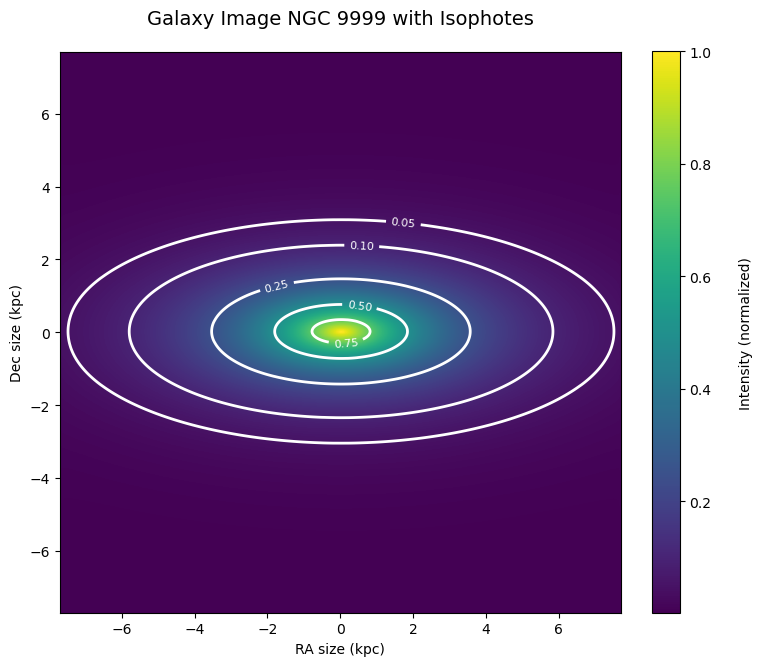

In [95]:
# convert the angular scale of the image to a physical size

# get physical constants and calculate distance d
from astropy.cosmology import Planck15
from astropy.constants import c

H0 = Planck15.H0
c = c.to('km/s')
z = 0.3

v = c * ((1 + z)**2 - 1)/((1 + z)**2 + 1)

d = v / H0

print(f"Hubble constant H0 = {H0}")
print(f"speed of light c = {c}")
print(f"velocity at z = {z} is {v}")
print(f"distance d = {d}")
print()

# convert arcsec to kpc
x_kpc_IMG_rel = x_ARCSEC_IMG_rel.value * d.value * 1000 * np.pi / (180 * 3600)
y_kpc_IMG_rel = y_ARCSEC_IMG_rel.value * d.value * 1000 * np.pi / (180 * 3600)

# show galaxy image in physical size (Isophotes)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

caxIMG = ax.imshow(IMG_normalized, cmap='viridis', origin='lower', interpolation='nearest', extent=[x_kpc_IMG_rel.min(), x_kpc_IMG_rel.max(), y_kpc_IMG_rel.min(), y_kpc_IMG_rel.max()])

cbarIMG = plt.colorbar(caxIMG, ax=ax, label='Intensity (normalized)', fraction=0.0453)

cbarIMG.set_label('Intensity (normalized)', labelpad=20)

levelsIMG = [0.05, 0.1, 0.25, 0.5, 0.75]
contoursIMG = ax.contour(IMG_normalized, levels=levelsIMG, colors='white', linewidths=2, extent=[x_kpc_IMG_rel.min(), x_kpc_IMG_rel.max(), y_kpc_IMG_rel.min(), y_kpc_IMG_rel.max()])

ax.clabel(contoursIMG, inline=True, fontsize=8)

ax.set_xlabel('RA size (kpc)')
ax.set_ylabel('Dec size (kpc)')

ax.set_title('Galaxy Image NGC 9999 with Isophotes', fontsize=14, pad=20)

plt.show()

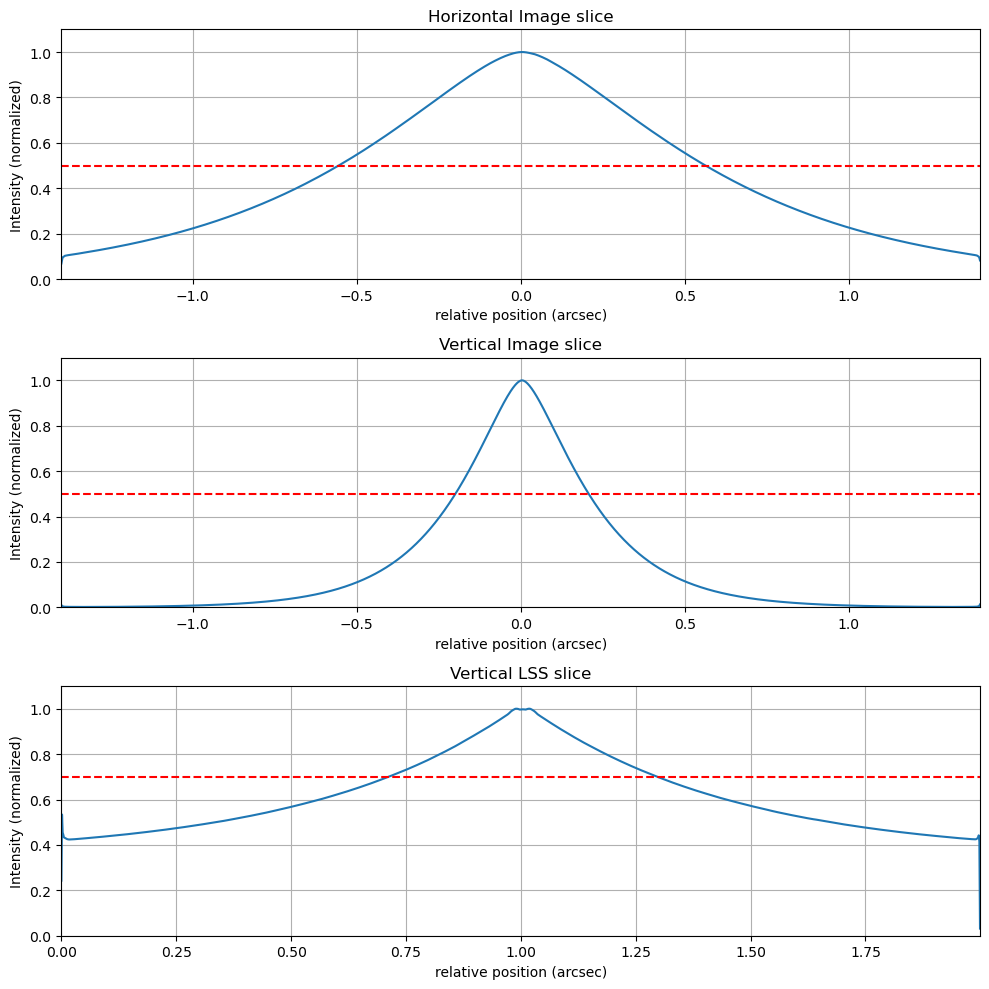

In [55]:
#X and Y cut IMG and Y cut LSS

y_IMG_profile = np.mean(IMG[500:1500, :], axis=0)
x_IMG_profile = np.mean(IMG[:, 500:1500], axis=1)

y_LSS_profile = np.mean(LSS, axis=1)

fix, axis = plt.subplots(3, 1, figsize=(10, 10))
axis[0].plot(y_ARCSEC_IMG_rel, y_IMG_profile / max(y_IMG_profile))
axis[0].set_xlim(np.min(y_ARCSEC_IMG_rel.value), np.max(y_ARCSEC_IMG_rel.value))
axis[0].set_ylim(0, 1.1)
axis[0].axhline(y=0.5, color='r', linestyle='--')
axis[0].set_xlabel('relative position (arcsec)')
axis[0].set_ylabel('Intensity (normalized)')
axis[0].set_title('Horizontal Image slice')
axis[0].grid(True)

axis[1].plot(x_ARCSEC_IMG_rel, x_IMG_profile / max(x_IMG_profile))
axis[1].set_xlim(np.min(x_ARCSEC_IMG_rel.value), np.max(x_ARCSEC_IMG_rel.value))
axis[1].set_ylim(0, 1.1)
axis[1].axhline(y=0.5, color='r', linestyle='--')
axis[1].set_xlabel('relative position (arcsec)')
axis[1].set_ylabel('Intensity (normalized)')
axis[1].set_title('Vertical Image slice')
axis[1].grid(True)

axis[2].plot(y_ARCSEC_LSS_rel, y_LSS_profile / max(y_LSS_profile))
axis[2].set_xlim(np.min(y_ARCSEC_LSS_rel.value), np.max(y_ARCSEC_LSS_rel.value))
axis[2].set_ylim(0, 1.1)
axis[2].axhline(y=0.7, color='r', linestyle='--')
axis[2].set_xlabel('relative position (arcsec)')
axis[2].set_ylabel('Intensity (normalized)')
axis[2].set_title('Vertical LSS slice')
axis[2].grid(True)

plt.tight_layout()
plt.show()

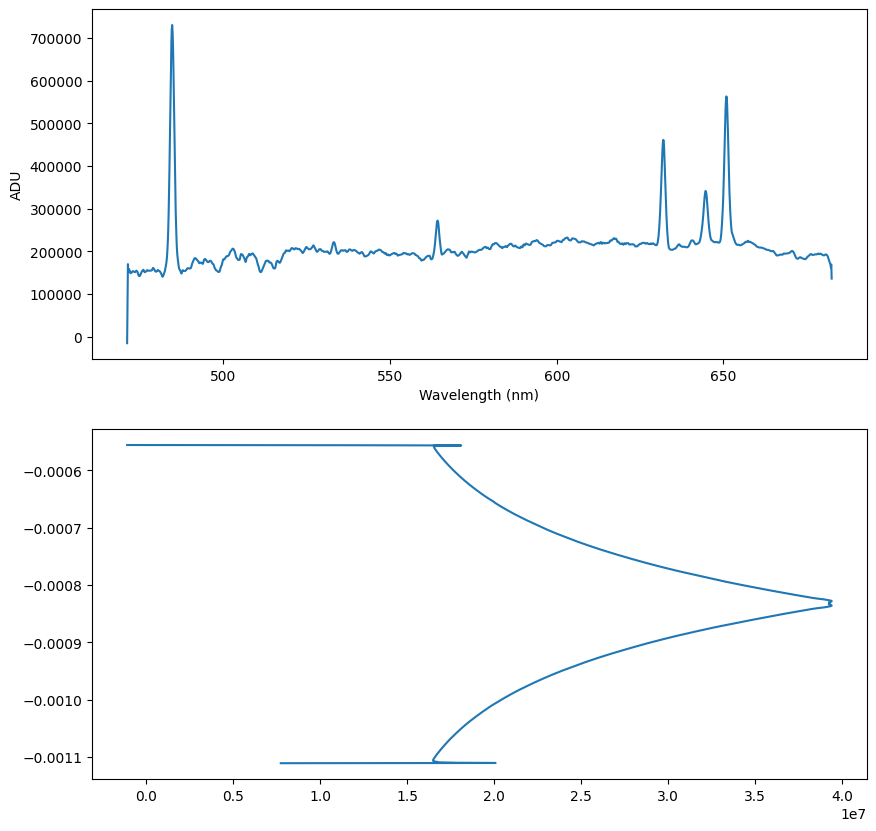

In [97]:
#LSS x cut

fig, axis = plt.subplots(2, 1, figsize=(10, 10))
axis[0].plot(x_NM_LSS, LSS[732, :])
axis[0].set_xlabel('Wavelength (nm)')
axis[0].set_ylabel('ADU')

flux = np.nansum(LSS[:, 600:800], axis=1)
axis[1].plot(flux, y_DEG_LSS)

plt.show()

Corrected Wavelengths: 
 1:	373.0000nm 
 2:	486.6154nm 
 3:	500.1538nm


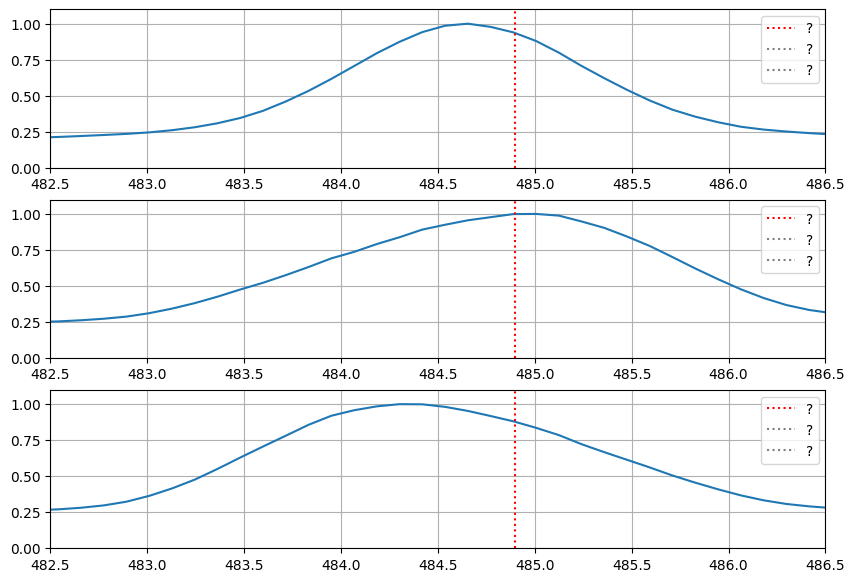

In [98]:
#Doppler Correction and Gauss-Fit

Z = 0.3


#z = fobs/femit - 1 => femit = fobs/(1+z)
def redshiftCorrection(wavelength):
    return(wavelength / (1+Z))


#Approx redshifted emmision-wavelengths in nm:
line1 = 484.9
line2 = 632.6
line3 = 650.2

fig, ax = plt.subplots(3, 1, figsize=(10, 7))
ax[0].plot(x_NM_LSS.value, LSS[732, :]/max(LSS[732, :]))
ax[0].vlines(line1, 0, 1.1, linestyles=':', colors='r', label='?')
ax[0].vlines(line2, 0, 1.1, linestyles=':', colors='gray', label='?')
ax[0].vlines(line3, 0, 1.1, linestyles=':', colors='grey', label='?')
#ax.set_xlim(min(x_NM_LSS.value), max(x_NM_LSS.value))
ax[0].set_xlim(482.5, 486.5)
ax[0].set_ylim(0, 1.1)
ax[0].grid()
ax[0].legend()

ax[1].plot(x_NM_LSS.value, LSS[100, :]/max(LSS[100, :]))
ax[1].vlines(line1, 0, 1.1, linestyles=':', colors='r', label='?')
ax[1].vlines(line2, 0, 1.1, linestyles=':', colors='gray', label='?')
ax[1].vlines(line3, 0, 1.1, linestyles=':', colors='grey', label='?')
#ax.set_xlim(min(x_NM_LSS.value), max(x_NM_LSS.value))
ax[1].set_xlim(482.5, 486.5)
ax[1].set_ylim(0, 1.1)
ax[1].grid()
ax[1].legend()

ax[2].plot(x_NM_LSS.value, LSS[1400, :]/max(LSS[1400, :]))
ax[2].vlines(line1, 0, 1.1, linestyles=':', colors='r', label='?')
ax[2].vlines(line2, 0, 1.1, linestyles=':', colors='gray', label='?')
ax[2].vlines(line3, 0, 1.1, linestyles=':', colors='grey', label='?')
#ax.set_xlim(min(x_NM_LSS.value), max(x_NM_LSS.value))
ax[2].set_xlim(482.5, 486.5)
ax[2].set_ylim(0, 1.1)
ax[2].grid()
ax[2].legend()


corrLine1 = redshiftCorrection(line1)
corrLine2 = redshiftCorrection(line2)
corrLine3 = redshiftCorrection(line3)

print(f'Corrected Wavelengths: \n 1:\t{corrLine1:.4f}nm \n 2:\t{corrLine2:.4f}nm \n 3:\t{corrLine3:.4f}nm')


Closes guesses with NIST-ASD so far:

Ti I 	373.0770 nm 
Fe II 	485.6152 nm 
Fe II 	500.1557 nm 



Text(0, 0.5, 'Diff.-Rot.')

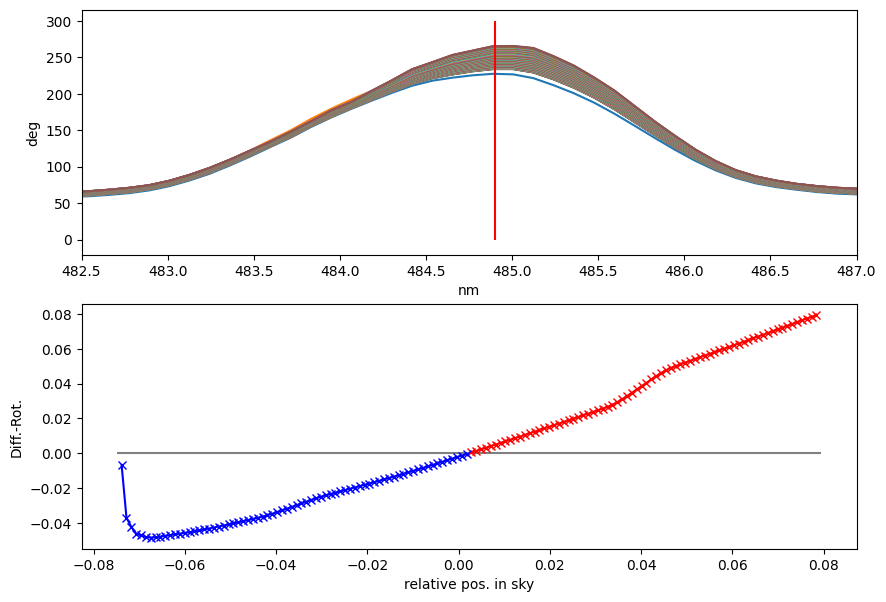

In [99]:
#Rot.-Curve (Samplinmg of 10 seems okay)
sliceSize = 10

fig, ax = plt.subplots(2, 1, figsize=(10, 7))
      
res = len(y_ARCSEC_LSS)//sliceSize

maxes = []

#Plotting Slices
for i in range(res):
    slit = np.divide(np.nanmean(LSS[i:i+sliceSize, :], axis=0), 1000)
    ax[0].plot(x_NM_LSS, slit)
    maxes.append(slit.max())

avg = np.median(maxes)

#Plt 1
ax[0].vlines(line1, 0, 300, linestyles='-', colors='r')
ax[0].set_xlim(482.5, 487)
ax[0].set_xlabel('nm')
ax[0].set_ylabel('deg')


#Abs to diff rotation
diffRot = np.empty_like(maxes)
for v in range(len(maxes)-1):
    diffRot[v] = maxes[v]-avg
diffRot = np.divide(diffRot, avg)

maxX = np.max(diffRot)
minX = np.min(diffRot)
avgX = np.average(diffRot)


x = np.linspace(minX, maxX, len(diffRot))

r = np.ma.masked_where(diffRot < 0, diffRot)
b = np.ma.masked_where(diffRot > 0, diffRot)

#Plt 2 (Cutting of the first and last cause of one sided shootovers from sum)
ax[1].hlines(0, minX, maxX, color='gray')
ax[1].plot(x[1:-1], r[1:-1], c='r', marker='x')
ax[1].plot(x[1:-1], b[1:-1], c='b', marker='x')
ax[1].set_xlabel('relative pos. in sky')
ax[1].set_ylabel('Diff.-Rot.')

